# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
from sklearn.cluster import KMeans
import math
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

pd.set_option('display.max_columns', None)

In [2]:
import random

np.random.seed(42)
random.seed(42)

# Read Data

first read the columns,
then read the data file and map data with the columns in corresponding order
read few rows of the loaded data

In [3]:
import pandas as pd

# Load column file
with open('census-bureau.columns', 'r') as f:
    cols = [line.strip() for line in f if line.strip()]

# Load data file

df = pd.read_csv('census-bureau.data', names=cols, sep=',')

df.head(5)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [4]:
df.shape

(199523, 42)

# EDA

check the numerical and categorical variables
1. found out there are numerical variables with few distinct values, they are more like categorical, but will label encode categorical to numerical later, so won't change these to categorical

In [5]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("number of numerical variables: ",len(numerical_cols))
num_table = df[numerical_cols].describe()
num_table.loc['distinct'] = df[numerical_cols].nunique()
num_table

number of numerical variables:  13


,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000
distinct,91.000000,52.000000,47.000000,1240.000000,132.00000,113.000000,1478.000000,99800.000000,7.000000,3.000000,3.000000,53.000000,2.000000


In [6]:
# Outlier detection using Z-score
outlier_summary = []

for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    
    z_scores = (df[col] - mean) / std
    outliers = df[abs(z_scores) > 3]
    
    n_outliers = len(outliers)
    pct_outliers = round((n_outliers / len(df)) * 100, 2)
    
    outlier_summary.append({
        'Variable': col,
        'Outliers': n_outliers,
        'Percentage': pct_outliers
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Percentage', ascending=False)
print(outlier_df.to_string(index=False))


                       Variable  Outliers  Percentage
  own business or self employed     16153        8.10
                  wage per hour      4967        2.49
                 capital losses      3814        1.91
                         weight      2126        1.07
                  capital gains      1460        0.73
          dividends from stocks      1396        0.70
       detailed industry recode         0        0.00
                            age         0        0.00
     detailed occupation recode         0        0.00
num persons worked for employer         0        0.00
              veterans benefits         0        0.00
           weeks worked in year         0        0.00
                           year         0        0.00


In [7]:

categorical_cols = df.select_dtypes(include=['object', 'str']).columns.tolist()
print("number of categorical variables: ",len(categorical_cols))
for col in categorical_cols:
    print(col,df[col].nunique(), "unique values")

number of categorical variables:  29
class of worker 9 unique values
education 17 unique values
enroll in edu inst last wk 3 unique values
marital stat 7 unique values
major industry code 24 unique values
major occupation code 15 unique values
race 5 unique values
hispanic origin 9 unique values
sex 2 unique values
member of a labor union 3 unique values
reason for unemployment 6 unique values
full or part time employment stat 8 unique values
tax filer stat 6 unique values
region of previous residence 6 unique values
state of previous residence 51 unique values
detailed household and family stat 38 unique values
detailed household summary in household 8 unique values
migration code-change in msa 10 unique values
migration code-change in reg 9 unique values
migration code-move within reg 10 unique values
live in this house 1 year ago 3 unique values
migration prev res in sunbelt 4 unique values
family members under 18 5 unique values
country of birth father 43 unique values
country of b

check out target variable, with/without weight

In [8]:
print("Target distribution (unweighted):", df['label'].value_counts())
print("Target distribution (weighted):", df.groupby('label')['weight'].sum())

Target distribution (unweighted): label
- 50000.    187141
50000+.      12382
Name: count, dtype: int64
Target distribution (weighted): label
- 50000.    3.250046e+08
50000+.     2.224125e+07
Name: weight, dtype: float64


Explore the basic missing values 'null' from each col
Only one col with 874 missing values out of 199523 so will just drop these instead of filling

In [9]:
missing = df.isnull().sum()
missing = missing[missing > 0]

In [10]:
print(missing)

hispanic origin    874
dtype: int64


drop the missing values

In [11]:
df = df.dropna()

df.shape

(198649, 42)

Next explore the categorical variables to understand the contents

In [12]:
# deep dive for categorical vars

categorical = df.select_dtypes(include=['object', 'str']).columns.tolist()

for col in categorical:
    print(col)
    print("Distinct values:", df[col].nunique())
    print("Top 3 values:")
    
    top3 = df[col].value_counts().head(3)
    for val, count in top3.items():
        pct = count / len(df) * 100
        print(val, np.round(pct,2), '%')
    print('\n')

class of worker
Distinct values: 9
Top 3 values:
Not in universe 50.24 %
Private 36.1 %
Self-employed-not incorporated 4.23 %


education
Distinct values: 17
Top 3 values:
High school graduate 24.26 %
Children 23.78 %
Some college but no degree 13.94 %


enroll in edu inst last wk
Distinct values: 3
Top 3 values:
Not in universe 93.69 %
High school 3.46 %
College or university 2.85 %


marital stat
Distinct values: 7
Top 3 values:
Never married 43.35 %
Married-civilian spouse present 42.22 %
Divorced 6.37 %


major industry code
Distinct values: 24
Top 3 values:
Not in universe or children 50.46 %
Retail trade 8.55 %
Manufacturing-durable goods 4.52 %


major occupation code
Distinct values: 15
Top 3 values:
Not in universe 50.46 %
Adm support including clerical 7.44 %
Professional specialty 6.99 %


race
Distinct values: 5
Top 3 values:
White 83.88 %
Black 10.23 %
Asian or Pacific Islander 2.93 %


hispanic origin
Distinct values: 9
Top 3 values:
All other 86.54 %
Mexican-American 4.0

show distribution by charts for easier understanding

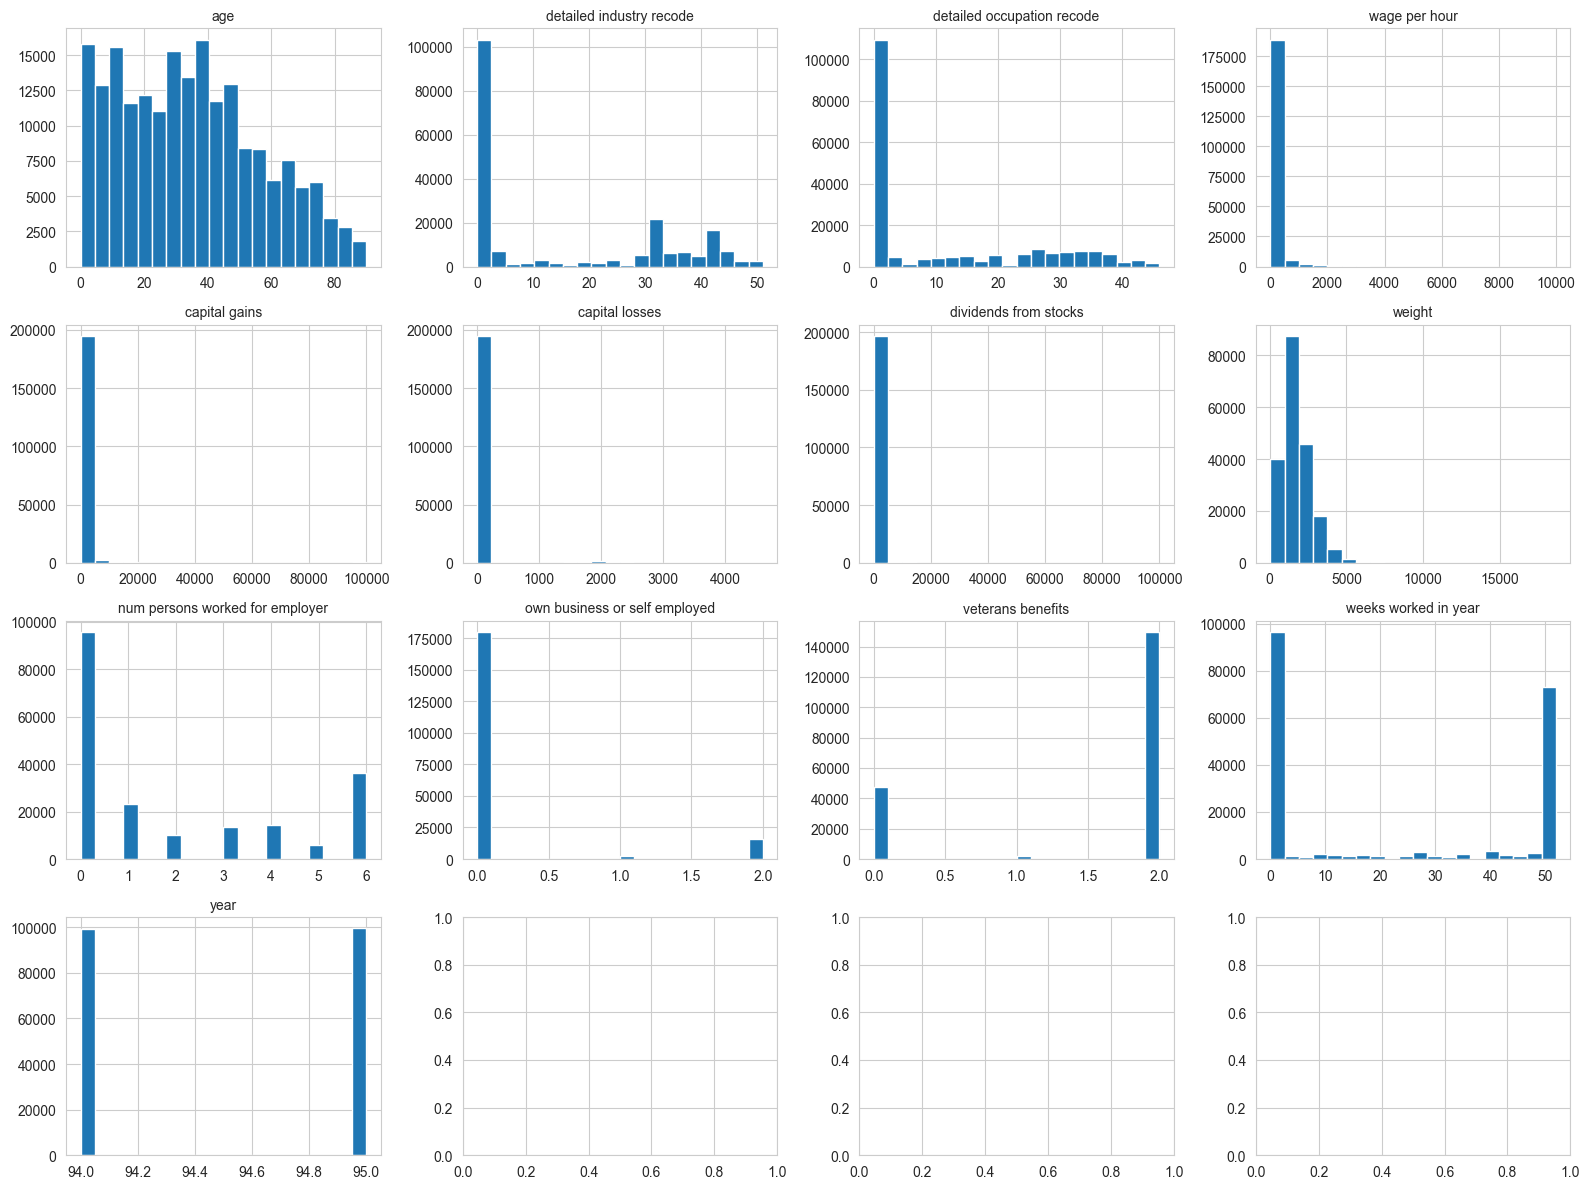

In [13]:
import matplotlib.pyplot as plt

n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20)
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(labelsize=10)

plt.tight_layout()
plt.show()

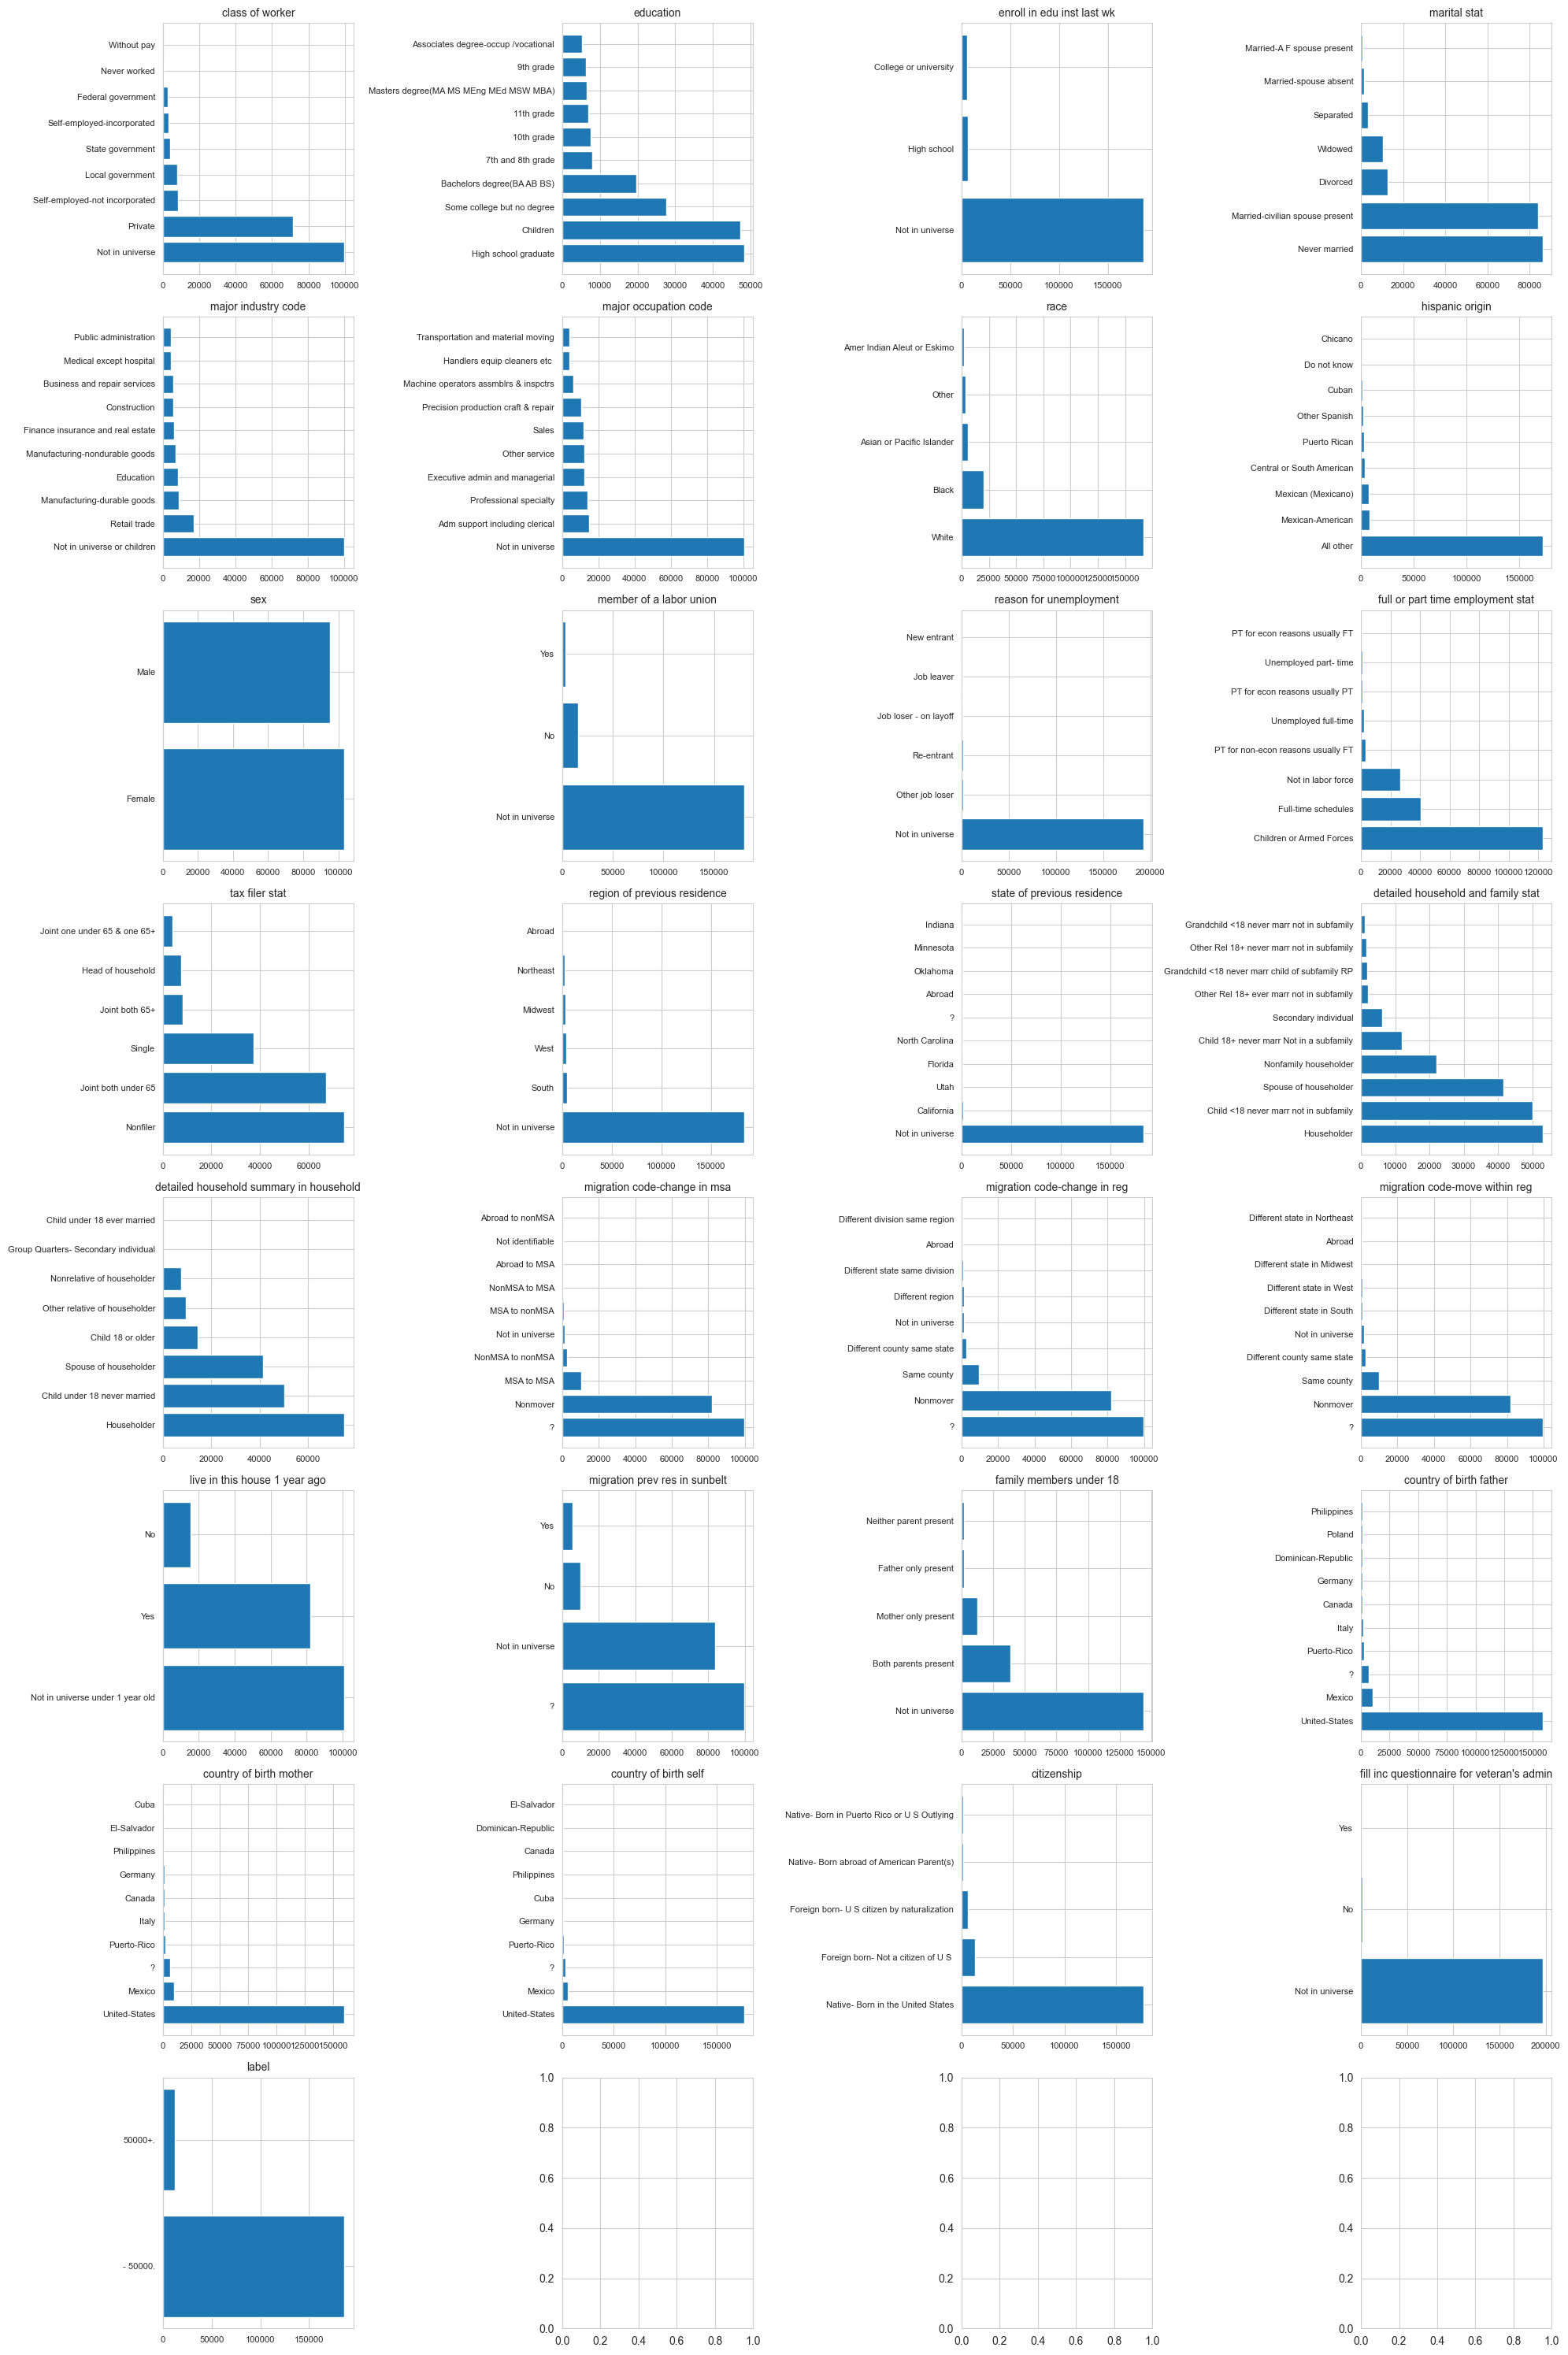

In [14]:
n_cols = 4
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    top10 = df[col].value_counts().head(10)
    axes[i].barh(range(len(top10)), top10.values)
    axes[i].set_yticks(range(len(top10)))
    axes[i].set_yticklabels(top10.index, fontsize=10)
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(labelsize=8)

plt.tight_layout()
plt.show()

Found out there are lots of not in universe of ? from categorical variables, need to see if these needs to be dropped
Firstly will see the proportion of them in each col

# Feature Engneering

In [15]:
# Check percentage of "Not in universe" and "?" for each column
problem_cols = []

for col in df.columns:
    total = len(df)
    not_in_uni_count = df[col].astype(str).str.contains('Not in universe', case=False).sum()
    q_count = (df[col] == '?').sum()

    problem_pct = (not_in_uni_count + q_count) / total * 100
    
    if problem_pct > 0:
        problem_cols.append({
            'col name': col,
            'not in universe vol': not_in_uni_count,
            '? vol': q_count,
            'total_missing': not_in_uni_count + q_count,
            '"%" of missing': problem_pct
        })

problem_df = pd.DataFrame(problem_cols).sort_values('total_missing', ascending=False)
problem_df

,col name,not in universe vol,? vol,total_missing,"""%"" of missing"
17,fill inc questionnaire for veteran's admin,196678,0,196678,99.007798
5,reason for unemployment,192611,0,192611,96.960468
1,enroll in edu inst last wk,186113,0,186113,93.689372
7,state of previous residence,183062,703,183765,92.507387
12,migration prev res in sunbelt,83550,99512,183062,92.153497
6,region of previous residence,183062,0,183062,92.153497
4,member of a labor union,179607,0,179607,90.414248
13,family members under 18,143562,0,143562,72.269178
10,migration code-move within reg,1509,99512,101021,50.854019
8,migration code-change in msa,1509,99512,101021,50.854019


fill inc questionnaire for veteran's  admin has too much not in universe value and it's overlap with veterans benefits which has higher quality, so drop this. For others will treat them as special categorical values and fit into model to avoid drop too many records. Will come back if model can not handle these values well.

In [16]:
df = df.drop(columns=['fill inc questionnaire for veteran\'s admin'])

drop year col as it is only a survey year

In [17]:
df = df.drop(columns=['year'])

In [18]:
df.shape

(198649, 40)

convert label to numerical target for training and correlation calculation.
convert categorical variables to numerical with label encoding as well

In [19]:
df['target'] = 0
df.loc[df['label'] == '50000+.', 'target'] = 1

print(df['target'].value_counts())

df = df.drop(columns=['label'])

target
0    186324
1     12325
Name: count, dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

for col in df.select_dtypes(include=['object','str']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col].astype(str))


In [21]:
df_encoded.head(5)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,veterans benefits,weeks worked in year,target
0,73,3,0,0,12,0,2,6,14,6,4,0,0,1,3,2,0,0,0,4,3,36,24,6,1700.09,0,0,0,1,0,0,4,40,40,40,4,0,2,0,0
1,58,6,4,34,16,0,2,0,4,8,4,0,1,1,3,0,0,0,0,0,4,5,20,4,1053.55,3,8,9,0,3,1,4,40,40,40,4,0,2,52,0
2,18,3,0,0,0,0,1,4,14,6,1,0,0,1,3,2,0,0,0,4,3,36,2,0,991.95,0,0,0,1,0,0,4,41,41,41,0,0,2,0,0
3,9,3,0,0,10,0,2,4,14,6,4,0,0,1,3,0,0,0,0,4,3,36,8,2,1758.14,7,6,7,2,2,0,0,40,40,40,4,0,0,0,0
4,10,3,0,0,10,0,2,4,14,6,4,0,0,1,3,0,0,0,0,4,3,36,8,2,1069.16,7,6,7,2,2,0,0,40,40,40,4,0,0,0,0


first use heat map to see correlation between variables, since we'll use tree model later so co linearity can be ignored

<Axes: >

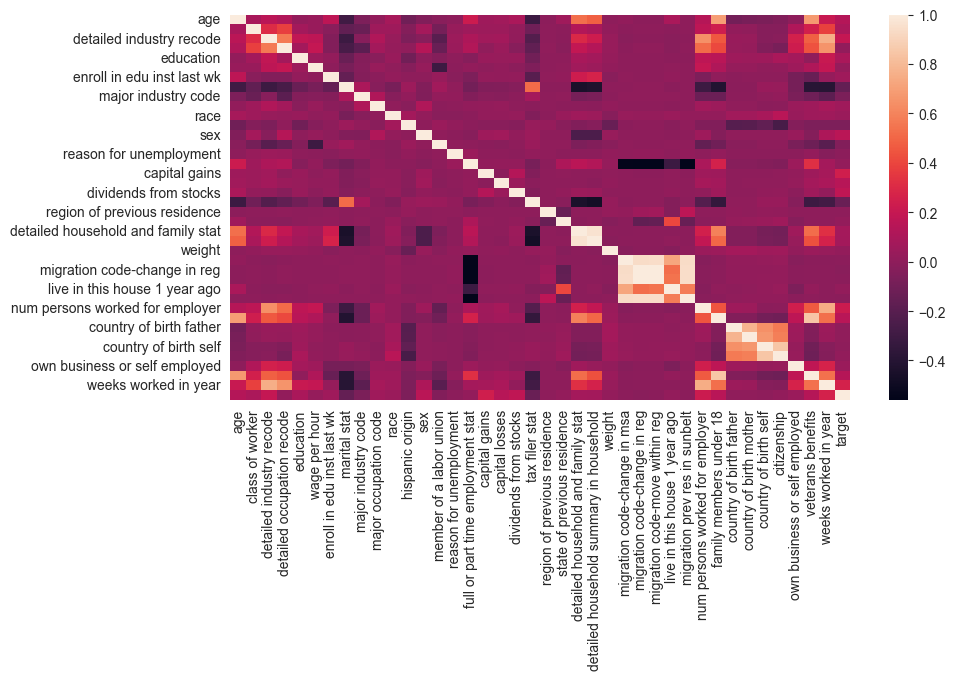

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize = (10,5))
sns.heatmap(df_encoded.corr(),annot=False)

correlations to target variables, this determins which variables are more important

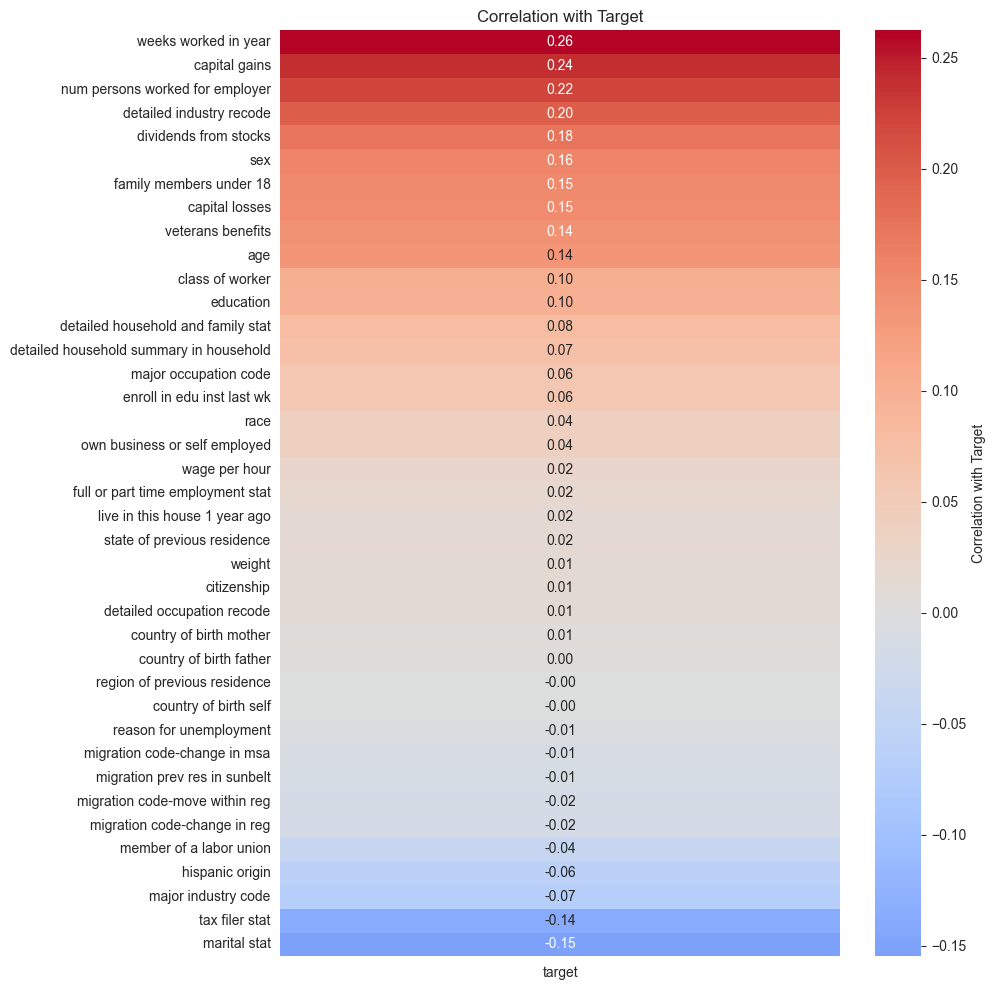

In [23]:

correlations = df_encoded.corr()['target'].sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.heatmap(correlations.drop('target').to_frame(), 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            cbar_kws={'label': 'Correlation with Target'})
plt.title('Correlation with Target')
plt.tight_layout()
plt.show()

final check on data format before modeling, all cols should be numerical now

In [24]:
numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
print("number of numerical variables: ",len(numerical_cols))
num_table = df_encoded[numerical_cols].describe()
num_table.loc['distinct'] = df_encoded[numerical_cols].nunique()
num_table

number of numerical variables:  40


,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,veterans benefits,weeks worked in year,target
count,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000
mean,34.485469,3.485474,15.354026,11.307029,10.036295,55.593766,1.908376,3.005447,13.005915,6.301914,3.644136,0.692921,0.478845,0.934638,3.009464,0.688974,433.668873,37.349682,197.569774,3.218224,3.008059,34.956290,20.056612,3.965769,1739.766410,3.252707,3.007078,3.482736,1.334530,0.977277,1.956436,3.053094,35.487392,35.665918,37.504407,3.618171,0.175455,1.514516,23.177036,0.062044
std,22.310531,1.105629,18.068402,14.454152,4.120055,275.317817,0.374520,1.408239,4.778898,3.104909,0.862966,1.917320,0.499554,0.302632,0.315027,1.197092,4685.588561,272.096264,1985.358588,1.384961,0.462130,5.635791,11.427187,2.069791,993.487448,3.395844,3.101171,3.592627,0.616078,1.017980,2.365404,1.606779,10.593484,10.379481,8.182713,1.111410,0.553729,0.851678,24.412360,0.241236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,3.000000,0.000000,0.000000,9.000000,0.000000,2.000000,2.000000,11.000000,6.000000,4.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,36.000000,8.000000,2.000000,1061.320000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,40.000000,40.000000,40.000000,4.000000,0.000000,2.000000,0.000000,0.000000
50%,33.000000,3.000000,0.000000,0.000000,10.000000,0.000000,2.000000,4.000000,14.000000,6.000000,4.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,36.000000,20.000000,4.000000,1617.190000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000,40.000000,40.000000,40.000000,4.000000,0.000000,2.000000,8.000000,0.000000
75%,50.000000,4.000000,33.000000,26.000000,12.000000,0.000000,2.000000,4.000000,14.000000,7.000000,4.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,4.000000,3.000000,36.000000,27.000000,6.000000,2188.070000,7.000000,6.000000,7.000000,2.000000,2.000000,4.000000,4.000000,40.000000,40.000000,40.000000,4.000000,0.000000,2.000000,52.000000,0.000000
max,90.000000,8.000000,51.000000,46.000000,16.000000,9999.000000,2.000000,6.000000,23.000000,14.000000,4.000000,8.000000,1.000000,2.000000,5.000000,7.000000,99999.000000,4608.000000,99999.000000,5.000000,5.000000,50.000000,37.000000,7.000000,18656.300000,9.000000,8.000000,9.000000,2.000000,3.000000,6.000000,4.000000,42.

In [25]:
df_encoded.shape

(198649, 40)

# Modeling Part

In [26]:
X = df_encoded.drop(columns=['target', 'weight'])
y = df_encoded['target']
weights = df_encoded['weight']

print("Variables:", X.shape)
print("Target:", y.shape)
print("Weights:", weights.shape)

Variables: (198649, 38)
Target: (198649,)
Weights: (198649,)


train validation test split with 60,20,20 to ensure performence. Also add weight from the data to recreate true population distribution

In [27]:
from sklearn.model_selection import train_test_split

# 60% train, 40% temp
X_train, X_temp, y_train, y_temp, w_train, w_temp = train_test_split(
    X, y, weights,
    test_size=0.4,
    random_state=42,
    stratify=y
)

# split temp into 50% validaion and 50% test
X_val, X_test, y_val, y_test, w_val, w_test = train_test_split(
    X_temp, y_temp, w_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("Train set:", len(X_train), "rows (60%)")
print("Validation set:", len(X_val), "rows (20%)")
print("Test set:", len(X_test), "rows (20%)")

Train set: 119189 rows (60%)
Validation set: 39730 rows (20%)
Test set: 39730 rows (20%)


start with a simple four model comparison, pick two of the best for deep dive

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.1),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, learning_rate=0.1, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
}


results = []

for name, model in models.items():
    print('Training: ',name)
    
    model.fit(X_train, y_train, sample_weight=w_train)
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_val, y_pred, sample_weight=w_val),
        'Precision': precision_score(y_val, y_pred, sample_weight=w_val),
        'Recall': recall_score(y_val, y_pred, sample_weight=w_val),
        'F1': f1_score(y_val, y_pred, sample_weight=w_val),
        'ROC-AUC': roc_auc_score(y_val, y_pred_proba, sample_weight=w_val)
    })

results_df = pd.DataFrame(results)
results_df

Training:  Logistic Regression
Training:  Random Forest
Training:  Gradient Boosting
Training:  XGBoost


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.807945,0.233790,0.887801,0.370115,0.921770
1,Random Forest,0.952096,0.730695,0.390016,0.508575,0.933974
2,Gradient Boosting,0.954507,0.735334,0.444012,0.553692,0.946937
3,XGBoost,0.869010,0.311426,0.876132,0.459515,0.947430


From the table above we could see rf and gb has highest f1 scores

In [29]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [50, 100, 200],
    'min_samples_leaf': [20, 50, 100]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [50, 100, 200],
    'min_samples_leaf': [20, 50, 100],
    'max_features': ['sqrt', 'log2']
}


print("Training Gradient Boosting...")
gb = GradientBoostingClassifier(random_state=42)

gb_search = RandomizedSearchCV(
    gb, 
    param_grid_gb,
    n_iter=20,  # just try 20 random combinations for efficency now
    cv=3,  # 3-fold cross validation
    scoring='f1', # prioritize f1 score
    random_state=42,
    n_jobs=-1,
    verbose=1
)

gb_search.fit(X_train, y_train, sample_weight=w_train)

print("Best GB params: ", gb_search.best_params_)
print("Best GB F1: ", gb_search.best_score_)

# Random Forest tuning
print("\Training Random Forest...")
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_search = RandomizedSearchCV(
    rf,
    param_grid_rf,
    n_iter=20,
    cv=3,
    scoring='f1',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_search.fit(X_train, y_train, sample_weight=w_train)

print("Best RF params: ", rf_search.best_params_)
print("Best RF F1: ", rf_search.best_score_)

Training Gradient Boosting...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best GB params:  {'n_estimators': 200, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_depth': 7, 'learning_rate': 0.1}
Best GB F1:  0.5755698250975357
\Training Random Forest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best RF params:  {'n_estimators': 200, 'min_samples_split': 50, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 30}
Best RF F1:  0.47900078747671687


In [30]:
# Get best estimators and generate probabilities
best_gb = gb_search.best_estimator_
best_rf = rf_search.best_estimator_

# Generate probabilities on validation set
y_pred_proba_gb = best_gb.predict_proba(X_val)[:, 1]
y_pred_proba_rf = best_rf.predict_proba(X_val)[:, 1]


In [31]:
thresholds = np.arange(0.1, 0.9, 0.05)
best_f1 = 0
best_threshold = 0.5

print("Finding optimal threshold on validation set...")

for threshold in thresholds:
    y_pred_temp = (y_pred_proba_gb >= threshold).astype(int)
    f1 = f1_score(y_val, y_pred_temp, sample_weight=w_val)
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print("Optimal threshold:", round(best_threshold, 2))
print("Best F1 on validation:", round(best_f1, 4))

# Now use optimal threshold
y_pred_gb = (y_pred_proba_gb >= best_threshold).astype(int)

print("\nGradient Boosting with optimal threshold:")
print("F1:", round(f1_score(y_val, y_pred_gb, sample_weight=w_val), 4))
print("Precision:", round(precision_score(y_val, y_pred_gb, sample_weight=w_val), 4))
print("Recall:", round(recall_score(y_val, y_pred_gb, sample_weight=w_val), 4))

Finding optimal threshold on validation set...
Optimal threshold: 0.3
Best F1 on validation: 0.6254

Gradient Boosting with optimal threshold:
F1: 0.6254
Precision: 0.6007
Recall: 0.6521


In [32]:
# Find optimal threshold for Random Forest
thresholds = np.arange(0.1, 0.9, 0.05)
best_f1_rf = 0
best_threshold_rf = 0.5

print("Finding optimal threshold for Random Forest...")

for threshold in thresholds:
    y_pred_temp = (y_pred_proba_rf >= threshold).astype(int)
    f1 = f1_score(y_val, y_pred_temp, sample_weight=w_val)
    
    if f1 > best_f1_rf:
        best_f1_rf = f1
        best_threshold_rf = threshold

print("Optimal threshold for RF:", round(best_threshold_rf, 2))
print("Best F1 on validation:", round(best_f1_rf, 4))

# Compare both models at their optimal thresholds
print("\n" + "="*60)
print("COMPARISON AT OPTIMAL THRESHOLDS")
print("="*60)
print("Gradient Boosting (threshold=0.30): F1 =", round(best_f1, 4))
print("Random Forest (threshold=" + str(round(best_threshold_rf, 2)) + "): F1 =", round(best_f1_rf, 4))

Finding optimal threshold for Random Forest...
Optimal threshold for RF: 0.75
Best F1 on validation: 0.5801

COMPARISON AT OPTIMAL THRESHOLDS
Gradient Boosting (threshold=0.30): F1 = 0.6254
Random Forest (threshold=0.75): F1 = 0.5801


In [33]:
# Evaluate GB at optimal threshold
y_pred_gb = (y_pred_proba_gb >= best_threshold).astype(int)
print("\nGradient Boosting (threshold=" + str(round(best_threshold, 2)) + "):")
print("F1:", round(f1_score(y_val, y_pred_gb, sample_weight=w_val), 4))
print("Precision:", round(precision_score(y_val, y_pred_gb, sample_weight=w_val), 4))
print("Recall:", round(recall_score(y_val, y_pred_gb, sample_weight=w_val), 4))

# Evaluate RF at optimal threshold
y_pred_rf = (y_pred_proba_rf >= best_threshold_rf).astype(int)
print("\nRandom Forest (threshold=" + str(round(best_threshold_rf, 2)) + "):")
print("F1:", round(f1_score(y_val, y_pred_rf, sample_weight=w_val), 4))
print("Precision:", round(precision_score(y_val, y_pred_rf, sample_weight=w_val), 4))
print("Recall:", round(recall_score(y_val, y_pred_rf, sample_weight=w_val), 4))


Gradient Boosting (threshold=0.3):
F1: 0.6254
Precision: 0.6007
Recall: 0.6521

Random Forest (threshold=0.75):
F1: 0.5801
Precision: 0.5304
Recall: 0.6401


GB is better than RF, so will use GB for test set

In [34]:
# Final model with optimal threshold
final_model = gb_search.best_estimator_

# Retrain on train+val
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])
w_train_full = pd.concat([w_train, w_val])

final_model.fit(X_train_full, y_train_full, sample_weight=w_train_full)

# Test with OPTIMAL threshold (not 0.3)
y_test_proba = final_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)  # Use best_threshold!


In [35]:
print("FINAL TEST RESULTS:")
print("F1:", round(f1_score(y_test, y_test_pred, sample_weight=w_test), 4))
print("Precision:", round(precision_score(y_test, y_test_pred, sample_weight=w_test), 4))
print("Recall:", round(recall_score(y_test, y_test_pred, sample_weight=w_test), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_test_proba, sample_weight=w_test), 4))

FINAL TEST RESULTS:
F1: 0.6198
Precision: 0.5985
Recall: 0.6427
ROC-AUC: 0.9526


In [36]:
#Full report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     37265
           1       0.60      0.64      0.62      2465

    accuracy                           0.95     39730
   macro avg       0.79      0.81      0.80     39730
weighted avg       0.95      0.95      0.95     39730



In [37]:
print(classification_report(y_test, y_test_pred, sample_weight=w_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97 64906301.29999972
           1       0.60      0.64      0.62 4523077.980000001

    accuracy                           0.95 69429379.27999972
   macro avg       0.79      0.81      0.80 69429379.27999972
weighted avg       0.95      0.95      0.95 69429379.27999972



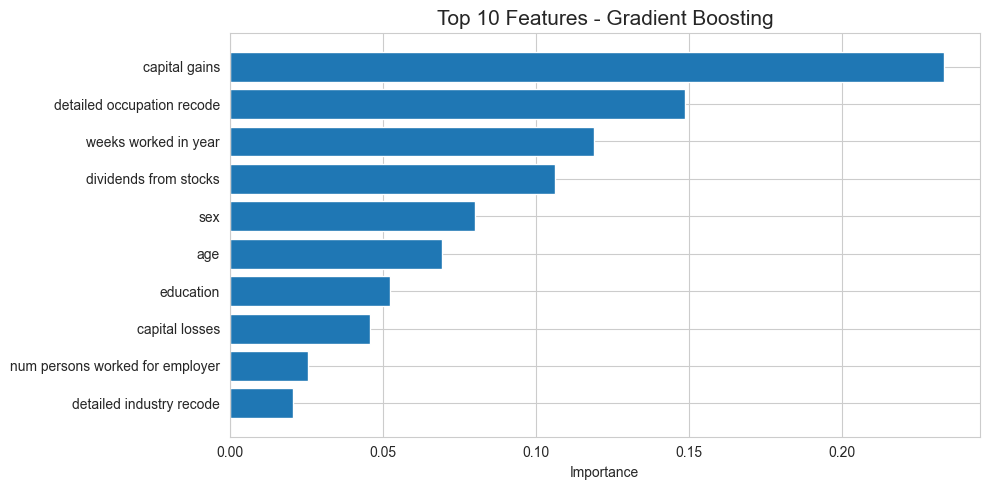

In [38]:
# Feature Importance from Gradient Boosting
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = final_model.feature_importances_
feature_names = X_train_full.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
top10 = importance_df.head(10)
plt.barh(range(10), top10['Importance'].values)
plt.yticks(range(10), top10['Feature'].values)
plt.xlabel('Importance')
plt.title('Top 10 Features - Gradient Boosting', fontsize=15)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Segmentation

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Standardlize data
X_vars = df_encoded.drop(columns=['target', 'weight'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vars)
X_scaled.shape

(198649, 38)

In [41]:
# Find optimal k using elbow method and silhouette_score score
inertias = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    print("k: ",k," Silhouette Score: ",np.round(silhouette_scores[-1],3))

k:  2  Silhouette Score:  0.121
k:  3  Silhouette Score:  0.15
k:  4  Silhouette Score:  0.162
k:  5  Silhouette Score:  0.126
k:  6  Silhouette Score:  0.134
k:  7  Silhouette Score:  0.132
k:  8  Silhouette Score:  0.14
k:  9  Silhouette Score:  0.142
k:  10  Silhouette Score:  0.137


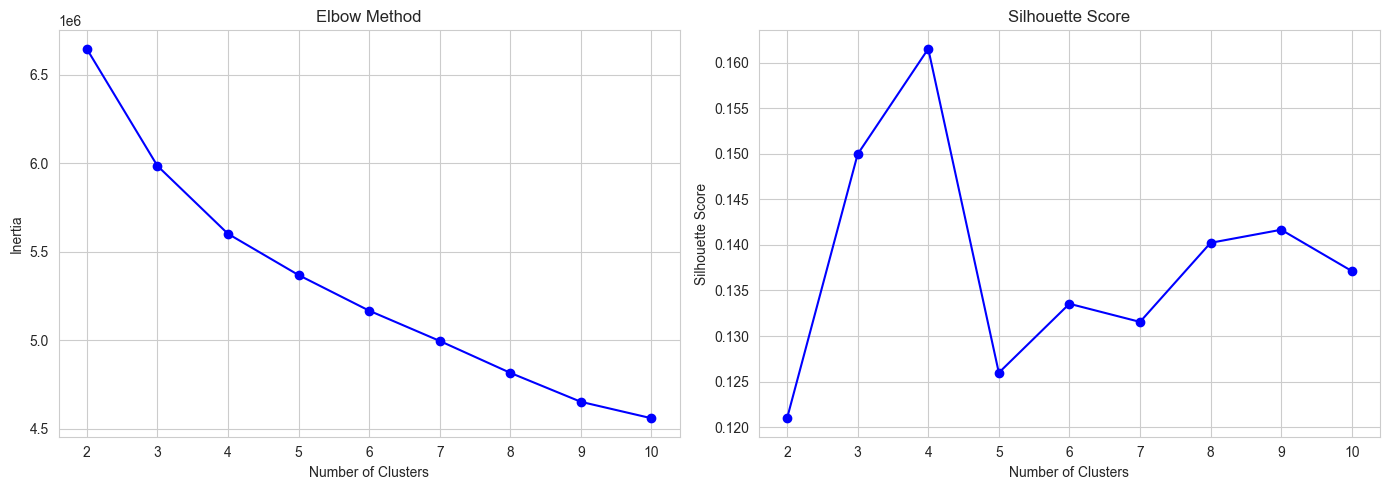

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(2, 11), inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')

axes[1].plot(range(2, 11), silhouette_scores, 'bo-')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score')

plt.tight_layout()
plt.show()

From the chart above we could see elbow method curve bent start to get more graduate from 4 and 5. Silhouette Score reaches highest at 4, so 4 is the best k to use.

In [43]:
best_k = 4
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters_kmeans = kmeans_final.fit_predict(X_scaled)

print("Best K: ",best_k)
print("Cluster sizes:")
print(pd.Series(clusters_kmeans).value_counts().sort_index())
print("Silhouette Score: ", np.round(silhouette_score(X_scaled, clusters_kmeans),3))

Best K:  4
Cluster sizes:
0    61664
1    53663
2    66236
3    17086
Name: count, dtype: int64
Silhouette Score:  0.162


In [44]:
#Check how many PCA components needed for 90% variance
pca_check = PCA(random_state=42)
pca_check.fit(X_scaled)

cumulative_variance = pca_check.explained_variance_ratio_.cumsum()

for n, var in enumerate(cumulative_variance, 1):
    if var >= 0.90:
        print("Components needed for 90% variance: ",n)
        break
    print("Components ",n,": ",np.round(var*100,2),'%')

Components  1 :  15.0 %
Components  2 :  27.14 %
Components  3 :  35.57 %
Components  4 :  41.84 %
Components  5 :  45.62 %
Components  6 :  49.13 %
Components  7 :  52.47 %
Components  8 :  55.55 %
Components  9 :  58.5 %
Components  10 :  61.41 %
Components  11 :  64.19 %
Components  12 :  66.88 %
Components  13 :  69.5 %
Components  14 :  72.0 %
Components  15 :  74.44 %
Components  16 :  76.77 %
Components  17 :  79.03 %
Components  18 :  81.26 %
Components  19 :  83.36 %
Components  20 :  85.41 %
Components  21 :  87.39 %
Components  22 :  89.17 %
Components needed for 90% variance:  23


In [45]:
from sklearn.cluster import DBSCAN

In [46]:
#DBSCAN with different parameters
for eps in [1, 2, 5]:
    for min_s in [50, 200, 500]:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise = (labels == -1).sum()
        print("eps=",eps,", min_samples=",min_s,", number of clusters: ",n_clusters,", number of noise points: ", noise)

eps= 1 , min_samples= 50 , number of clusters:  135 , number of noise points:  131568
eps= 1 , min_samples= 200 , number of clusters:  36 , number of noise points:  148811
eps= 1 , min_samples= 500 , number of clusters:  13 , number of noise points:  162332
eps= 2 , min_samples= 50 , number of clusters:  98 , number of noise points:  85260
eps= 2 , min_samples= 200 , number of clusters:  22 , number of noise points:  112153
eps= 2 , min_samples= 500 , number of clusters:  17 , number of noise points:  129338
eps= 5 , min_samples= 50 , number of clusters:  2 , number of noise points:  3774
eps= 5 , min_samples= 200 , number of clusters:  3 , number of noise points:  7089
eps= 5 , min_samples= 500 , number of clusters:  1 , number of noise points:  11231


In [47]:

pca = PCA(n_components=23, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Variance explained: ", np.round(pca.explained_variance_ratio_.sum(),2))

# K-Means with PCA
kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca)

print("Cluster sizes:")
print(pd.Series(clusters_pca).value_counts().sort_index())
print("Silhouette Score: ", np.round(silhouette_score(X_pca, clusters_pca),3))

Variance explained:  0.91
Cluster sizes:
0    60952
1    65266
2    18471
3    53960
Name: count, dtype: int64
Silhouette Score:  0.182


In [48]:

df_encoded['segment'] = clusters_pca

print("Segment distribution:")
print(df_encoded['segment'].value_counts().sort_index())

print("\nWeighted segment distribution (population):")
for seg in sorted(df_encoded['segment'].unique()):
    mask = df_encoded['segment'] == seg
    weighted = df_encoded[mask]['weight'].sum()
    pct = weighted / df_encoded['weight'].sum() * 100
    print("Segment",seg,": ",np.int64(np.round(weighted,0)),'people', ",",np.round(pct,1),'%')

Segment distribution:
segment
0    60952
1    65266
2    18471
3    53960
Name: count, dtype: int64

Weighted segment distribution (population):
Segment 0 :  107715067 people , 31.2 %
Segment 1 :  117970841 people , 34.1 %
Segment 2 :  28760799 people , 8.3 %
Segment 3 :  91156151 people , 26.4 %


In [49]:

profile_cols = ['age', 'education', 'sex', 'marital stat', 
                'class of worker', 'weeks worked in year',
                'capital gains', 'dividends from stocks', 'target']

for seg in sorted(df_encoded['segment'].unique()):
    mask = df_encoded['segment'] == seg
    segment_data = df_encoded[mask]
    
    print("\nSEGMENT", seg, "(", len(segment_data), "people ):")
    print("-"*40)
    print("  Age (mean):", round(segment_data['age'].mean(), 1))
    print("  Weeks worked (mean):", round(segment_data['weeks worked in year'].mean(), 1))
    print("  Capital gains (mean):", round(segment_data['capital gains'].mean(), 1))
    print("  Dividends (mean):", round(segment_data['dividends from stocks'].mean(), 1))
    print("  High income (>50K):", round(segment_data['target'].mean()*100, 1), "%")


SEGMENT 0 ( 60952 people ):
----------------------------------------
  Age (mean): 44.8
  Weeks worked (mean): 32.6
  Capital gains (mean): 594.2
  Dividends (mean): 285.1
  High income (>50K): 8.6 %

SEGMENT 1 ( 65266 people ):
----------------------------------------
  Age (mean): 44.1
  Weeks worked (mean): 32.7
  Capital gains (mean): 649.2
  Dividends (mean): 290.6
  High income (>50K): 9.3 %

SEGMENT 2 ( 18471 people ):
----------------------------------------
  Age (mean): 42.1
  Weeks worked (mean): 25.2
  Capital gains (mean): 406.8
  Dividends (mean): 150.7
  High income (>50K): 5.5 %

SEGMENT 3 ( 53960 people ):
----------------------------------------
  Age (mean): 8.5
  Weeks worked (mean): 0.3
  Capital gains (mean): 0.9
  Dividends (mean): 2.2
  High income (>50K): 0.0 %


In [50]:

df['segment'] = clusters_pca

print("="*60)
print("SEGMENT CATEGORICAL PROFILES")
print("="*60)

cat_cols = ['education', 'sex', 'marital stat', 'class of worker', 'major occupation code']

for seg in sorted(df['segment'].unique()):
    mask = df['segment'] == seg
    segment_data = df[mask]
    
    print("\nSEGMENT", seg, ":")
    print("-"*40)
    for col in cat_cols:
        top_val = segment_data[col].value_counts().index[0]
        top_pct = round(segment_data[col].value_counts().values[0] / len(segment_data) * 100, 1)
        print(" ", col, ":", top_val, "(", top_pct, "%)")

SEGMENT CATEGORICAL PROFILES

SEGMENT 0 :
----------------------------------------
  education : High school graduate ( 34.8 %)
  sex : Female ( 53.2 %)
  marital stat : Married-civilian spouse present ( 59.2 %)
  class of worker : Private ( 49.7 %)
  major occupation code : Not in universe ( 30.5 %)

SEGMENT 1 :
----------------------------------------
  education : High school graduate ( 33.9 %)
  sex : Female ( 53.2 %)
  marital stat : Married-civilian spouse present ( 57.7 %)
  class of worker : Private ( 50.3 %)
  major occupation code : Not in universe ( 30.4 %)

SEGMENT 2 :
----------------------------------------
  education : High school graduate ( 23.1 %)
  sex : Female ( 53.0 %)
  marital stat : Married-civilian spouse present ( 54.5 %)
  class of worker : Private ( 44.9 %)
  major occupation code : Not in universe ( 44.4 %)

SEGMENT 3 :
----------------------------------------
  education : Children ( 86.0 %)
  sex : Male ( 50.8 %)
  marital stat : Never married ( 99.6 %)
 

In [51]:

for seg in [0, 1, 2]:
    mask = df['segment'] == seg
    segment_data = df[mask]
    
    print("\nSEGMENT", seg, ":")
    print("-"*40)
    
    # Numerical
    print("  Age (mean):", round(segment_data['age'].mean(), 1))
    print("  Weeks worked:", round(segment_data['weeks worked in year'].mean(), 1))
    
    # Categorical
    for col in ['race', 'tax filer stat', 'full or part time employment stat',
                'detailed household summary in household']:
        top_val = segment_data[col].value_counts().index[0]
        top_pct = round(segment_data[col].value_counts().values[0] / len(segment_data) * 100, 1)
        print(" ", col, ":", top_val, "(", top_pct, "%)")


SEGMENT 0 :
----------------------------------------
  Age (mean): 44.8
  Weeks worked: 32.6
  race : White ( 87.9 %)
  tax filer stat : Joint both under 65 ( 47.4 %)
  full or part time employment stat : Children or Armed Forces ( 100.0 %)
  detailed household summary in household : Householder ( 53.1 %)

SEGMENT 1 :
----------------------------------------
  Age (mean): 44.1
  Weeks worked: 32.7
  race : White ( 86.4 %)
  tax filer stat : Joint both under 65 ( 46.7 %)
  full or part time employment stat : Full-time schedules ( 55.2 %)
  detailed household summary in household : Householder ( 52.6 %)

SEGMENT 2 :
----------------------------------------
  Age (mean): 42.1
  Weeks worked: 25.2
  race : White ( 75.1 %)
  tax filer stat : Joint both under 65 ( 42.2 %)
  full or part time employment stat : Children or Armed Forces ( 50.1 %)
  detailed household summary in household : Householder ( 45.2 %)


In [52]:
print(segment_data['full or part time employment stat'].value_counts().index[0])
print(round(segment_data['full or part time employment stat'].value_counts().values[0] / len(segment_data) * 100, 1))

Children or Armed Forces
50.1


In [53]:

segment_names = {
    0: 'Armed Forces',
    1: 'Full-time Working Adults',
    2: 'Part-time & Irregular Workers',
    3: 'Children & Dependents'
}

df['segment_name'] = df['segment'].map(segment_names)
df_encoded['segment_name'] = df_encoded['segment'].map(segment_names)

print("FINAL SEGMENT SUMMARY")
print("-"*60)

for seg, name in segment_names.items():
    mask = df['segment'] == seg
    size = mask.sum()
    high_income = round(df_encoded[mask]['target'].mean() * 100, 1)
    avg_age = round(df[mask]['age'].mean(), 1)
    
    print("\nSegment", seg, ":", name)
    print("  Size:", size, "(", round(size/len(df)*100, 1), "%)")
    print("  Avg Age:", avg_age)
    print("  High Income:", high_income, "%")

FINAL SEGMENT SUMMARY
------------------------------------------------------------

Segment 0 : Armed Forces
  Size: 60952 ( 30.7 %)
  Avg Age: 44.8
  High Income: 8.6 %

Segment 1 : Full-time Working Adults
  Size: 65266 ( 32.9 %)
  Avg Age: 44.1
  High Income: 9.3 %

Segment 2 : Part-time & Irregular Workers
  Size: 18471 ( 9.3 %)
  Avg Age: 42.1
  High Income: 5.5 %

Segment 3 : Children & Dependents
  Size: 53960 ( 27.2 %)
  Avg Age: 8.5
  High Income: 0.0 %


In [54]:

segment_names = {
    0: 'Armed Forces',
    1: 'Full-time Working Adults',
    2: 'Part-time & Irregular Workers',
    3: 'Children & Dependents'
}

segment_groups = {
    'Geographic': ['region of previous residence', 'state of previous residence', 
                   'citizenship', 'country of birth self'],
    
    'Education': ['education', 'enroll in edu inst last wk', 'age'],
    
    'Financial': ['capital gains', 'capital losses', 'dividends from stocks', 
                  'wage per hour', 'weeks worked in year']
}

for group_name, features in segment_groups.items():
    print("\n" + "-"*50)
    print(group_name)
    print("-"*50)
    
    for seg in sorted(df_encoded['segment'].unique()):
        mask = df_encoded['segment'] == seg
        high_income = round(df_encoded[mask]['target'].mean() * 100, 1)
        name = segment_names[seg]
        
        print("\n  Segment", seg, "-", name, "(", mask.sum(), "people,", high_income, "% high income):")
        for col in features:
            print("   ", col, "mean:", round(df_encoded[mask][col].mean(), 2))


--------------------------------------------------
Geographic
--------------------------------------------------

  Segment 0 - Armed Forces ( 60952 people, 8.6 % high income):
    region of previous residence mean: 3.05
    state of previous residence mean: 34.45
    citizenship mean: 3.93
    country of birth self mean: 39.72

  Segment 1 - Full-time Working Adults ( 65266 people, 9.3 % high income):
    region of previous residence mean: 2.97
    state of previous residence mean: 35.67
    citizenship mean: 3.92
    country of birth self mean: 39.71

  Segment 2 - Part-time & Irregular Workers ( 18471 people, 5.5 % high income):
    region of previous residence mean: 2.99
    state of previous residence mean: 34.06
    citizenship mean: 0.7
    country of birth self mean: 16.26

  Segment 3 - Children & Dependents ( 53960 people, 0.0 % high income):
    region of previous residence mean: 3.01
    state of previous residence mean: 34.97
    citizenship mean: 3.91
    country of birt

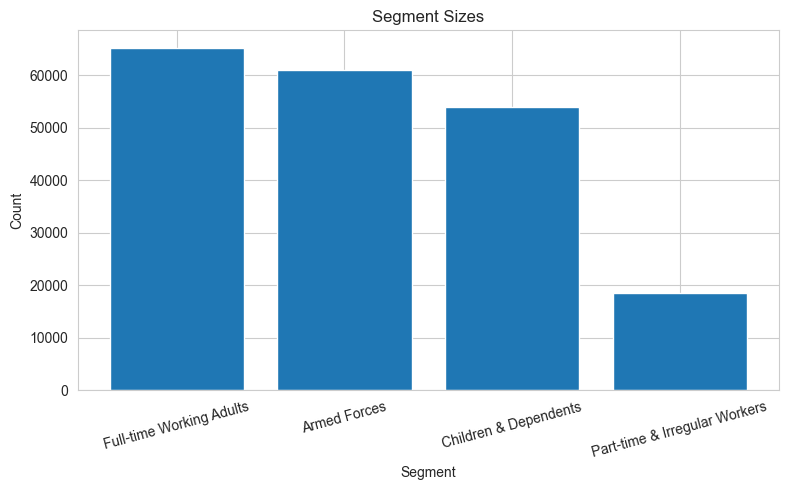

In [55]:

plt.figure(figsize=(8, 5))
segment_counts = df['segment_name'].value_counts()
plt.bar(segment_counts.index, segment_counts.values)
plt.title('Segment Sizes')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

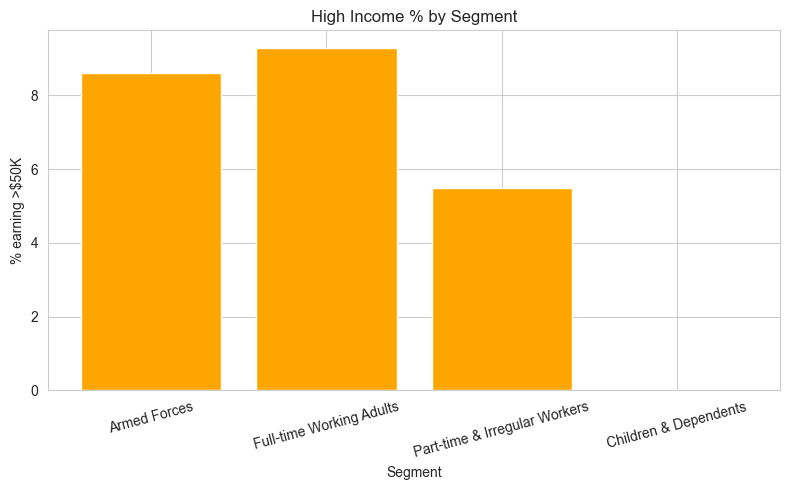

In [56]:

segments = list(segment_names.values())
high_income_pcts = []

for seg in sorted(segment_names.keys()):
    mask = df_encoded['segment'] == seg
    pct = round(df_encoded[mask]['target'].mean() * 100, 1)
    high_income_pcts.append(pct)

plt.figure(figsize=(8, 5))
plt.bar(segments, high_income_pcts, color='orange')
plt.title('High Income % by Segment')
plt.xlabel('Segment')
plt.ylabel('% earning >$50K')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

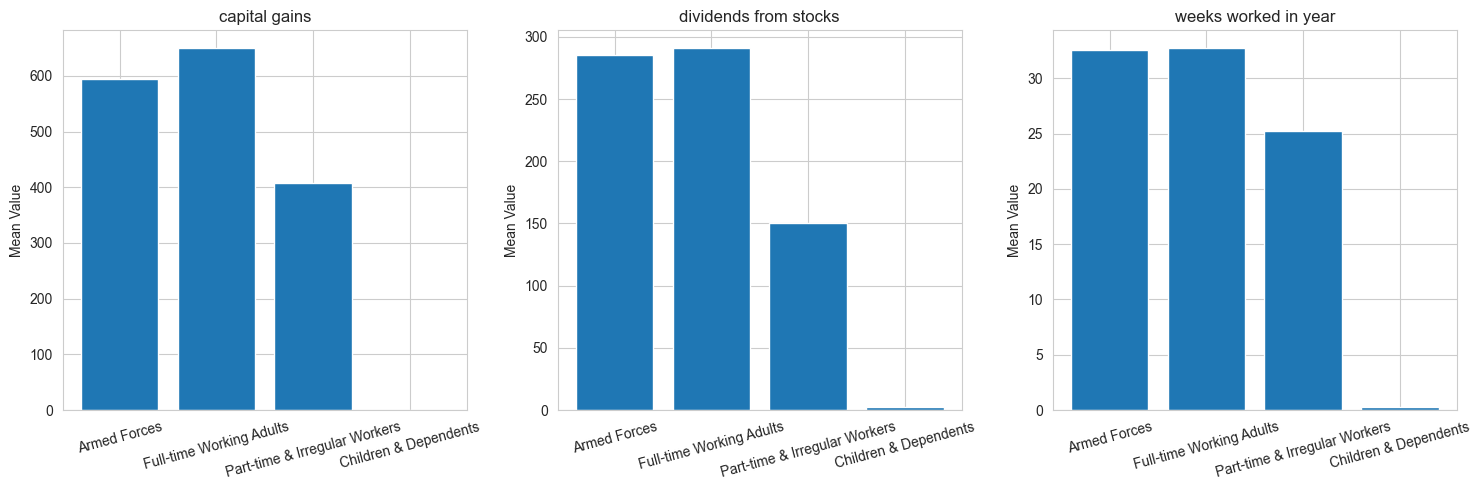

In [57]:

metrics = ['capital gains', 'dividends from stocks', 'weeks worked in year']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, metric in enumerate(metrics):
    values = []
    for seg in sorted(segment_names.keys()):
        mask = df_encoded['segment'] == seg
        values.append(round(df_encoded[mask][metric].mean(), 1))
    
    axes[i].bar(segments, values)
    axes[i].set_title(metric)
    axes[i].set_ylabel('Mean Value')
    axes[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

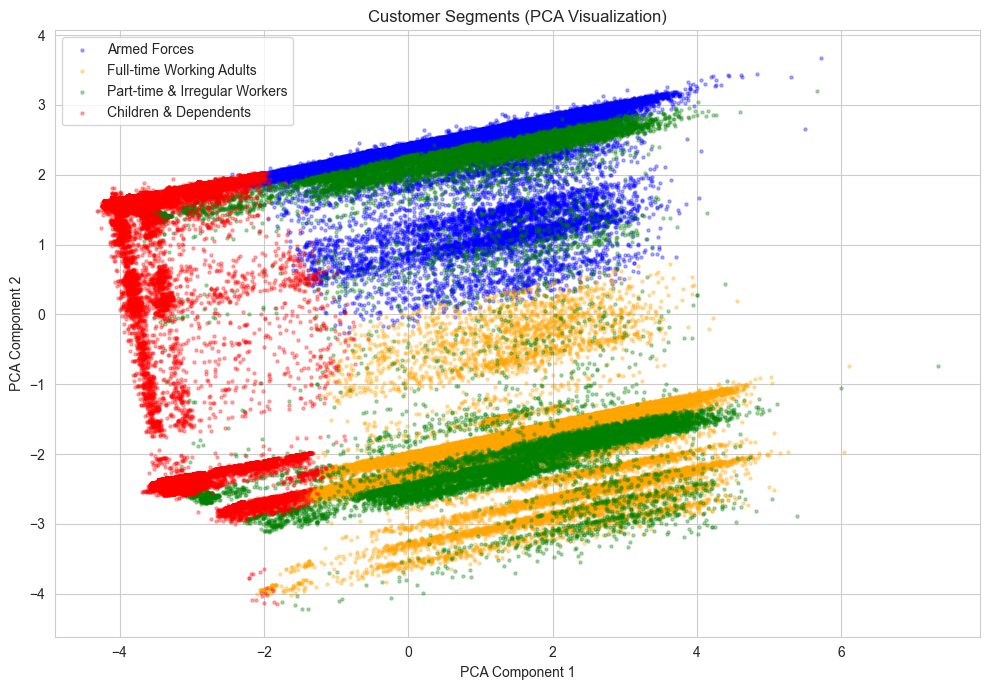

In [58]:
# Visualization 4: PCA scatter plot colored by segment
pca_viz = PCA(n_components=2, random_state=42)
X_viz = pca_viz.fit_transform(X_scaled)

colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(10, 7))
for seg in sorted(segment_names.keys()):
    mask = df_encoded['segment'] == seg
    plt.scatter(X_viz[mask, 0], X_viz[mask, 1], 
                label=segment_names[seg],
                alpha=0.3, s=5, color=colors[seg])

plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.tight_layout()
plt.show()